# Housing Project

## Data Description

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

Out task here is to perform EDA to gain conclusions from data and build a machine learning model to predict sale prices.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score,confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import pickle

import warnings
warnings.filterwarnings('ignore')

### Loading Data set

In [2]:
df_train= pd.read_csv(r"train.csv")
df_train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [3]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### About Columns:

1. MSSubClass: (Categorical) type of dwelling involved in the sale.

2. MSZoning: (Categorical) general zoning classification of the sale.

3. LotFrontage: (Continuous) Linear feet of street connected to property

4. LotArea: Lot size in square feet

5. Street: (Categorical) Type of road access to property

6. Alley: (Categorical) Type of alley access to property

7. LotShape: (Categorical) General shape of property

8. LandContour: (Categorical) Flatness of the property

9. Utilities: (Categorical) Type of utilities available

10. LotConfig: (Categorical) Lot configuration

11. LandSlope: (Categorical) Slope of property

12. Neighborhood: (Categorical) Physical locations within Ames city limits

13. Condition1: (Categorical) Proximity to various conditions

14. Condition2: (Categorical) Proximity to various conditions (if more than one is present)

15. BldgType: (Categorical) Type of dwelling

16. HouseStyle: (Categorical) Style of dwelling

17. OverallQual: (Categorical) Rates the overall material and finish of the house

18. OverallCond: (Categorical) Rates the overall condition of the house

19. YearBuilt: (datetime)Original construction date

20.  YearRemodAdd: (Continuous) Remodel date (same as construction date if no remodeling or additions)

21. RoofStyle: (Categorical) Type of roof		

22. RoofMatl: (Categorical) Roof material

23. Exterior1st: (Categorical) Exterior covering on house

24. Exterior2nd: (Categorical) Exterior covering on house (if more than one material)

25. MasVnrType: (Categorical) Masonry veneer type	

26. MasVnrArea: (Continuous) Masonry veneer area in square feet

27. ExterQual: (Categorical) Evaluates the quality of the material on the exterior 

28. ExterCond: (Categorical) Evaluates the present condition of the material on the exterior

29. Foundation: (Categorical) Type of foundation

30. BsmtQual: (Categorical) Evaluates the height of the basement

31. BsmtCond: (Categorical) Evaluates the general condition of the basement

32. BsmtExposure: (Categorical) Refers to walkout or garden level walls

33. BsmtFinType1: (Categorical) Rating of basement finished area

34. BsmtFinSF1: (Continuous) Type 1 finished square feet

35. BsmtFinType2: (Categorical) Rating of basement finished area (if multiple types)

36. BsmtFinSF2: (Continuous) Type 2 finished square feet

37. BsmtUnfSF: (Continuous) Unfinished square feet of basement area

38. TotalBsmtSF: (Continuous) Total square feet of basement area

39. Heating: (Categorical) Type of heating

40. HeatingQC: (Categorical) Heating quality and condition

41. CentralAir: (Categorical) Central air conditioning

42. Electrical: (Categorical) Electrical system

43. 1stFlrSF: (Continuous) First Floor square feet

44. 2ndFlrSF: (Continuous) Second floor square feet

45. LowQualFinSF: (Continuous) Low quality finished square feet (all floors)

46. GrLivArea: (Continuous) Above grade (ground) living area square feet

47. BsmtFullBath: (Continuous discrete) Basement full bathrooms

48. BsmtHalfBath: (Continuous discrete)  Basement half bathrooms

49. FullBath: (Continuous discrete)  Full bathrooms above grade

50. HalfBath: (Continuous discrete)  Half baths above grade

51. Bedroom: (Continuous discrete)  Bedrooms above grade (does NOT include basement bedrooms)

52. Kitchen: (discrete) Kitchens above grade

53. KitchenQual: (Categorical) Kitchen quality

54. TotRmsAbvGrd: (Continuous discrete)  Total rooms above grade (does not include bathrooms)

55. Functional: (Categorical) Home functionality (Assume typical unless deductions are warranted)

56. Fireplaces: (Continuous discrete)  Number of fireplaces

57. FireplaceQu: (Categorical) Fireplace quality

58. GarageType: (Categorical) Garage location

59. GarageYrBlt: (Continuous discrete)  Year garage was built

60. GarageFinish: (Categorical) Interior finish of the garage

61. GarageCars: (Continuous discrete)   Size of garage in car capacity

62. GarageArea: (Continuous)  Size of garage in square feet

63. GarageQual: (Categorical) Garage quality

64. GarageCond: (Categorical) Garage condition		

65. PavedDrive: (Categorical) Paved driveway

66. WoodDeckSF: (Continuous) Wood deck area in square feet

67. OpenPorchSF: (Continuous) Open porch area in square feet

68. EnclosedPorch: (Continuous) Enclosed porch area in square feet

69. 3SsnPorch: (Continuous) Three season porch area in square feet

70. ScreenPorch: (Continuous) Screen porch area in square feet

71. PoolArea: (Continuous) Pool area in square feet

72. PoolQC: (Categorical) Pool quality

73. Fence: (Categorical) Fence quality

74. MiscFeature: (Categorical) Miscellaneous feature not covered in other categories

75. MiscVal: (Continuous discrete) $Value of miscellaneous feature

76. MoSold: (Continuous discrete) Month Sold (MM)

77. YrSold:  (Continuous discrete) Year Sold (YYYY)

78. SaleType: (Categorical) Type of sale

79. SaleCondition: (Categorical) Condition of sale

### Statistical Analysis

In [4]:
df_train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

From above step we can look closely at mean, standard deviation, minimum value, maximum value and quantiles of each variable.

## EDA

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
Id               1168 non-null int64
MSSubClass       1168 non-null int64
MSZoning         1168 non-null object
LotFrontage      954 non-null float64
LotArea          1168 non-null int64
Street           1168 non-null object
Alley            77 non-null object
LotShape         1168 non-null object
LandContour      1168 non-null object
Utilities        1168 non-null object
LotConfig        1168 non-null object
LandSlope        1168 non-null object
Neighborhood     1168 non-null object
Condition1       1168 non-null object
Condition2       1168 non-null object
BldgType         1168 non-null object
HouseStyle       1168 non-null object
OverallQual      1168 non-null int64
OverallCond      1168 non-null int64
YearBuilt        1168 non-null int64
YearRemodAdd     1168 non-null int64
RoofStyle        1168 non-null object
RoofMatl         1168 non-null object
Exterior1st      1168 non-nu

We observe that data has both object and numeric type data and also it has null values.

In [6]:
df_train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       214
LotArea             0
Street              0
Alley            1091
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          7
MasVnrArea          7
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       551
GarageType         64
GarageYrBlt        64
GarageFinish       64
GarageCars          0
GarageArea          0
GarageQual         64
GarageCond         64
PavedDrive

We observe null values in "LotFrontage", "Alley", "MasVnrType", "MasVnrArea", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageYrBlt", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence" and "MiscFeature".
We will now move forward to vizualize each variable.

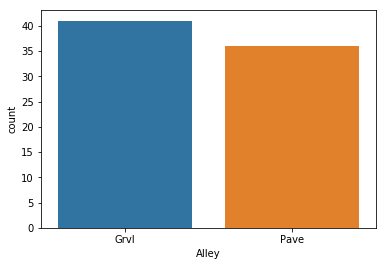

In [7]:
sns.countplot(df_train["Alley"])

In [8]:
df_train["Alley"].value_counts()

Grvl    41
Pave    36
Name: Alley, dtype: int64

Since No Alley access is also a possibility we will consider null values as object and keep the as a category.

In [9]:
df_train["MasVnrType"].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

Here null values will be labelled as "none" as we cannot makeout masonry veneer type.

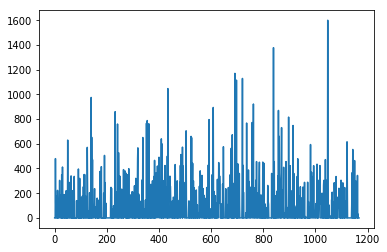

In [10]:
plt.plot(df_train["MasVnrArea"])

In [11]:
df_train["BsmtQual"].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

Nan values will be treated as no basement

In [12]:
df_train["BsmtCond"].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

All the null values in "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1" and "BsmtFinType2" will be considered as mo basement in house.

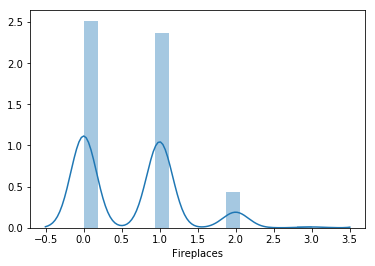

In [13]:
sns.distplot(df_train["Fireplaces"])

from above analysis we observe that for most features we will be keeping null values as a category.

### Bivariate Analysis

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

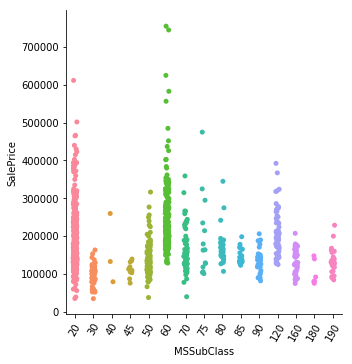

In [14]:
sns.catplot(x="MSSubClass", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

We observe that one storey newer style and 2 storey newer style may have higher prices.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

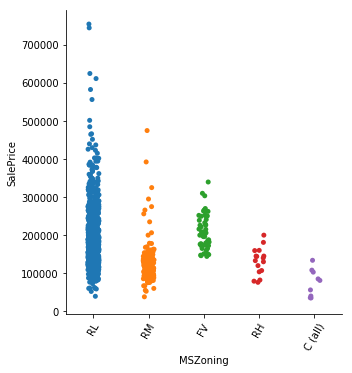

In [15]:
sns.catplot(x="MSZoning", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Location of houses in resedntial spaces with low or medium density impacts the price of house.

(array([0, 1]), <a list of 2 Text xticklabel objects>)

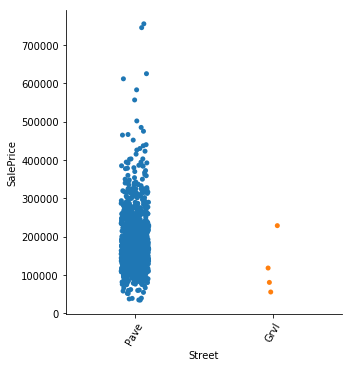

In [16]:
sns.catplot(x="Street", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

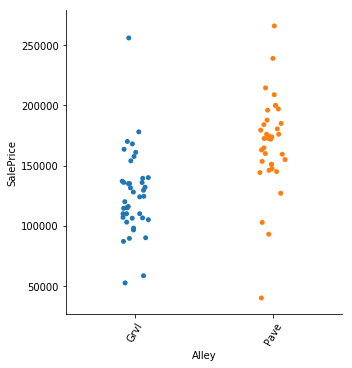

In [17]:
sns.catplot(x="Alley", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

People may prefer paved Alley access to house causing higher price.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

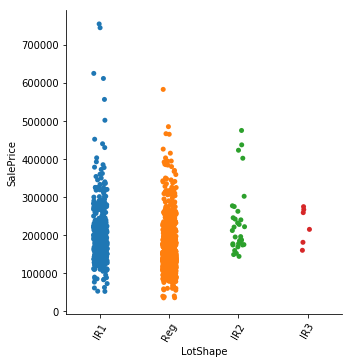

In [18]:
sns.catplot(x="LotShape", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

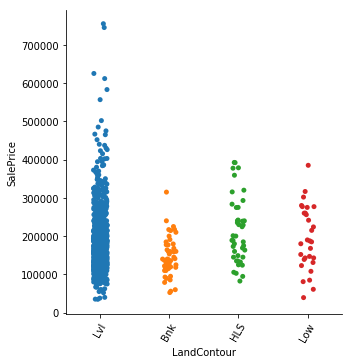

In [19]:
sns.catplot(x="LandContour", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0]), <a list of 1 Text xticklabel objects>)

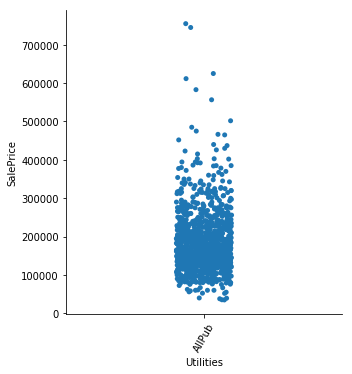

In [20]:
sns.catplot(x="Utilities", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

We will be deleting this column as it wont contribute to our model due to one constant value.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

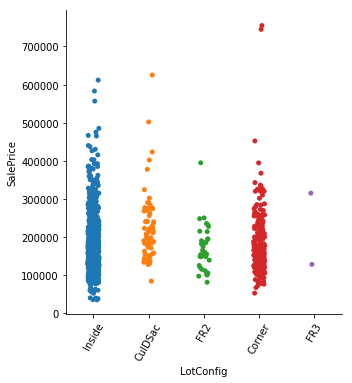

In [21]:
sns.catplot(x="LotConfig", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

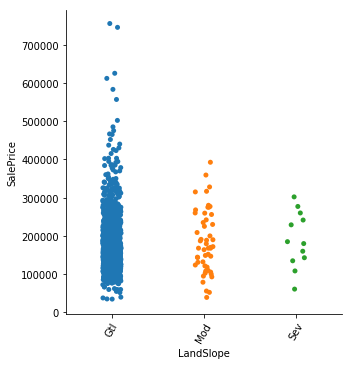

In [22]:
sns.catplot(x="LandSlope", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

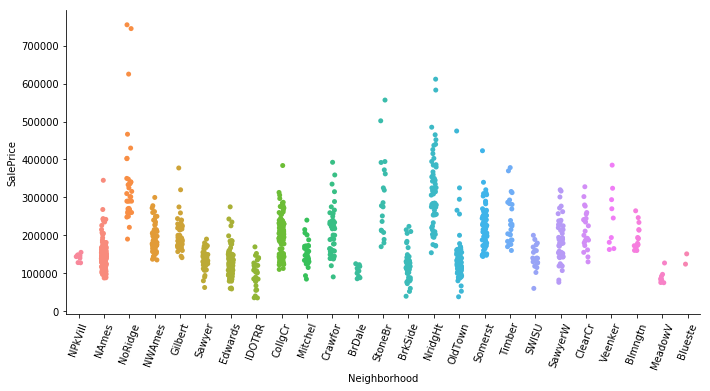

In [23]:
sns.catplot(x="Neighborhood", y="SalePrice", data=df_train, aspect=2)
plt.xticks(rotation=70)

Locality of house also impacts the sale price. Here we observe houses located in northridge area are of higher value

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

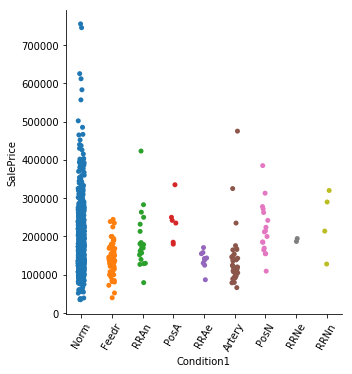

In [24]:
sns.catplot(x="Condition1", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

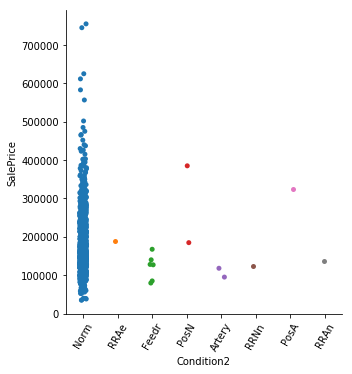

In [25]:
sns.catplot(x="Condition2", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

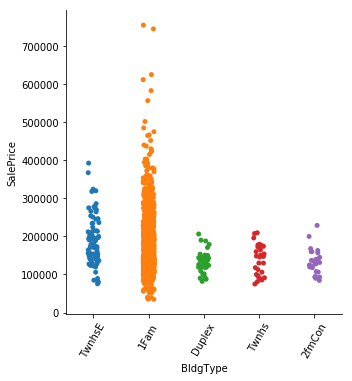

In [26]:
sns.catplot(x="BldgType", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Single family detached type of dwelling is most preferred by people and thus may lead to higher prices.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

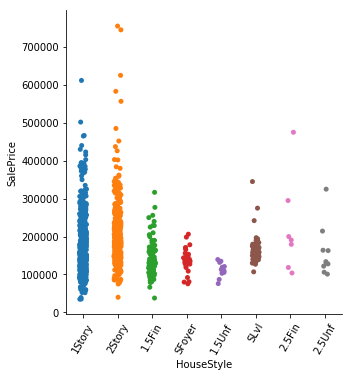

In [27]:
sns.catplot(x="HouseStyle", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Two storey houses have higher prices.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

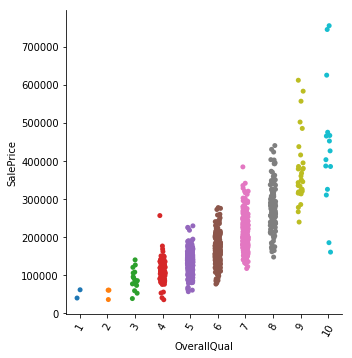

In [28]:
sns.catplot(x="OverallQual", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Quality as obvious effects the price of house

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

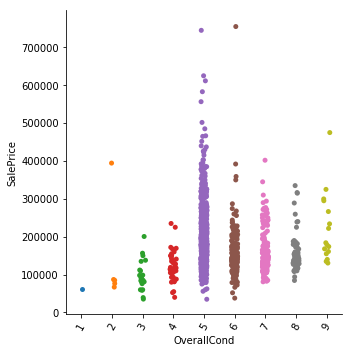

In [29]:
sns.catplot(x="OverallCond", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

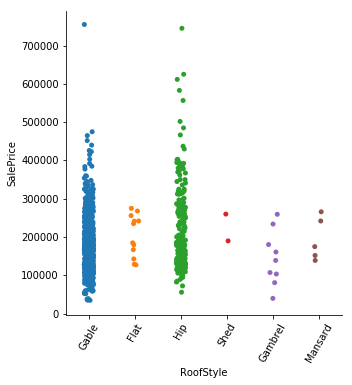

In [30]:
sns.catplot(x="RoofStyle", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Roof style also impacts the sale price. Here, Hip and Gable are giving higher prices.

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

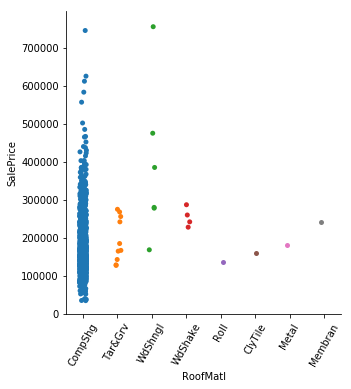

In [31]:
sns.catplot(x="RoofMatl", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

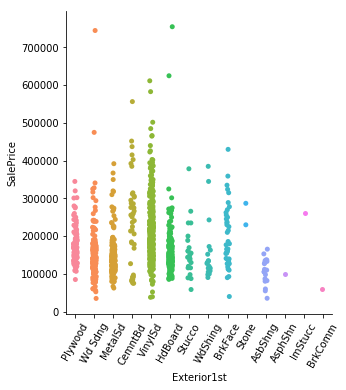

In [32]:
sns.catplot(x="Exterior1st", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

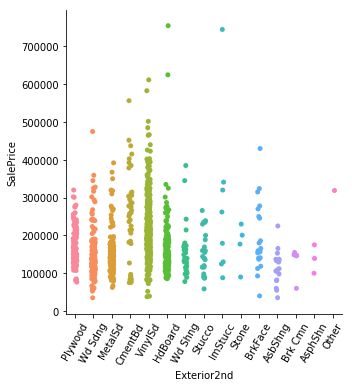

In [33]:
sns.catplot(x="Exterior2nd", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

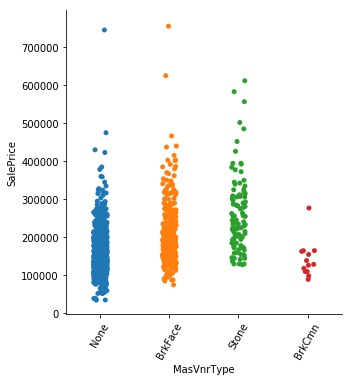

In [34]:
sns.catplot(x="MasVnrType", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

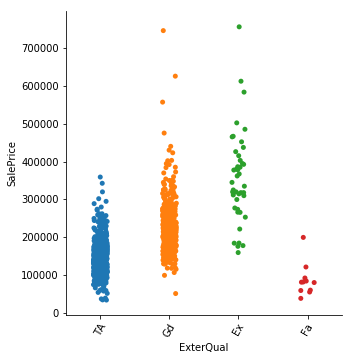

In [35]:
sns.catplot(x="ExterQual", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

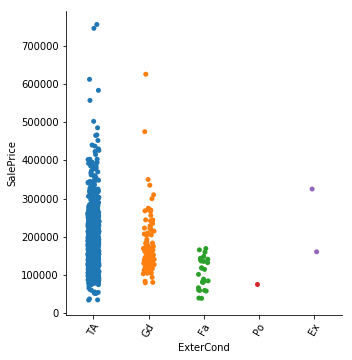

In [36]:
sns.catplot(x="ExterCond", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

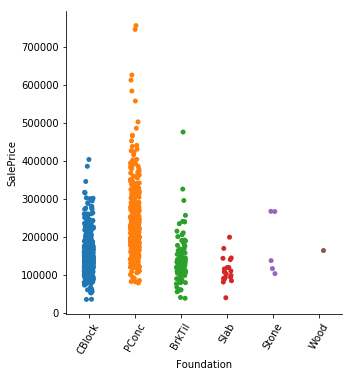

In [37]:
sns.catplot(x="Foundation", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

prices maybe high for concrete material used in houses.

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

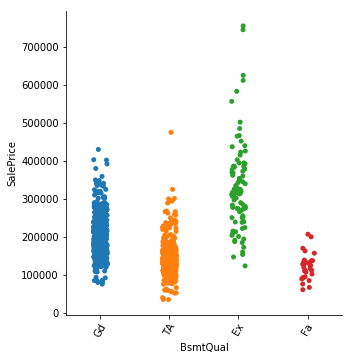

In [38]:
sns.catplot(x="BsmtQual", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

Basement with excellent height have high prices

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

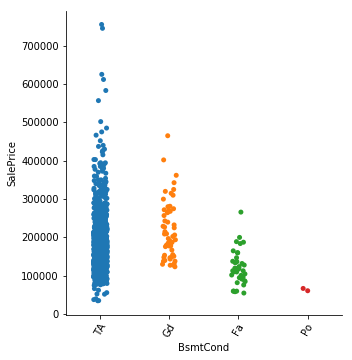

In [39]:
sns.catplot(x="BsmtCond", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

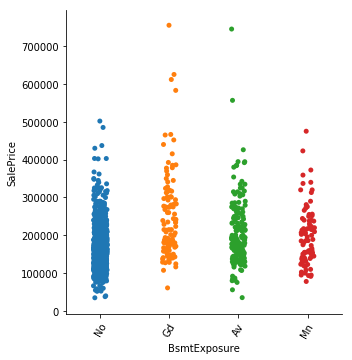

In [40]:
sns.catplot(x="BsmtExposure", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

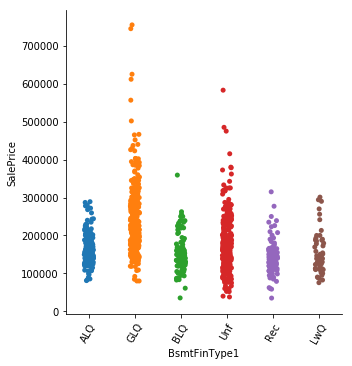

In [41]:
sns.catplot(x="BsmtFinType1", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

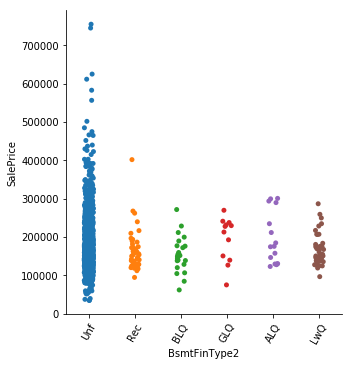

In [42]:
sns.catplot(x="BsmtFinType2", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

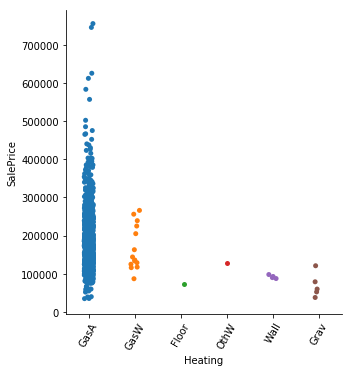

In [43]:
sns.catplot(x="Heating", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

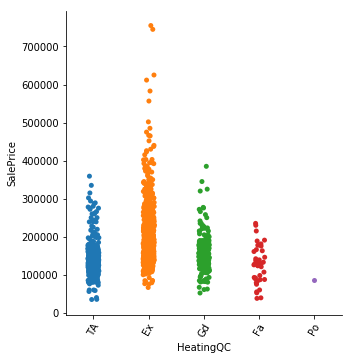

In [44]:
sns.catplot(x="HeatingQC", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

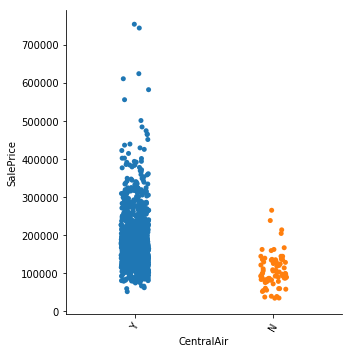

In [45]:
sns.catplot(x="CentralAir", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

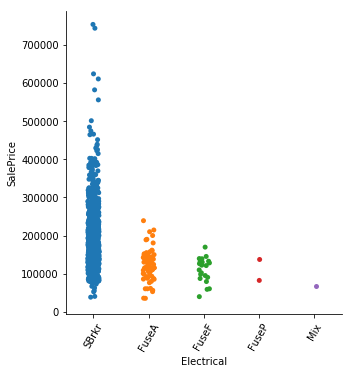

In [46]:
sns.catplot(x="Electrical", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

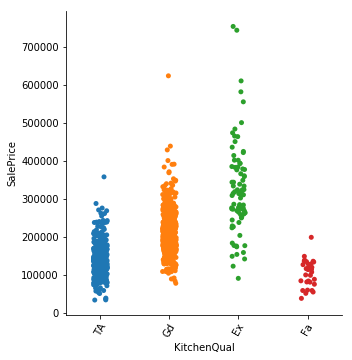

In [47]:
sns.catplot(x="KitchenQual", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

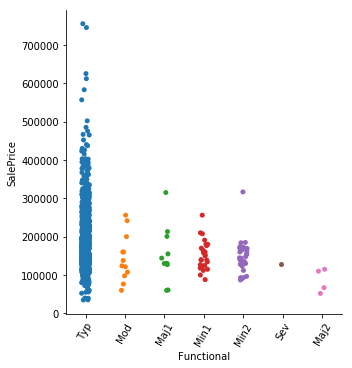

In [48]:
sns.catplot(x="Functional", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

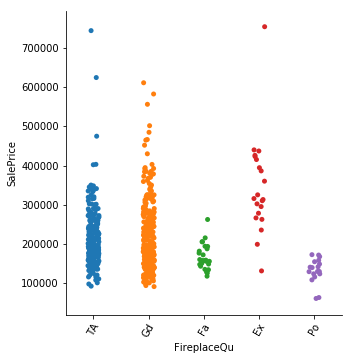

In [49]:
sns.catplot(x="FireplaceQu", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

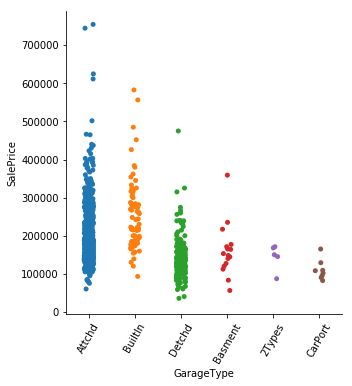

In [50]:
sns.catplot(x="GarageType", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

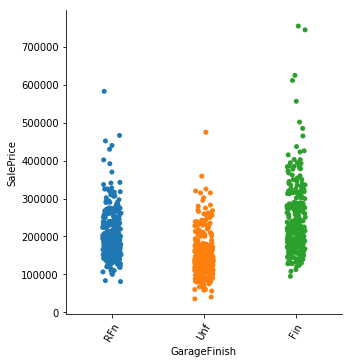

In [51]:
sns.catplot(x="GarageFinish", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

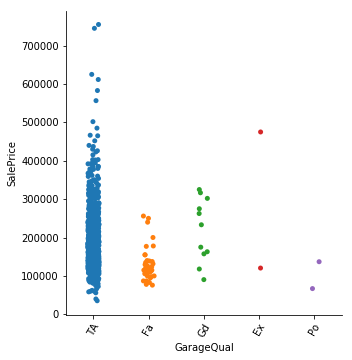

In [52]:
sns.catplot(x="GarageQual", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

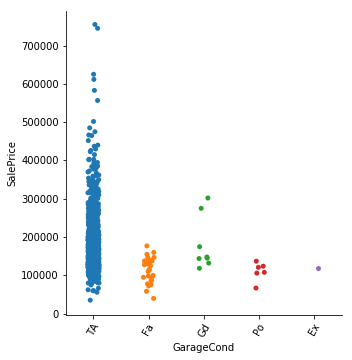

In [53]:
sns.catplot(x="GarageCond", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

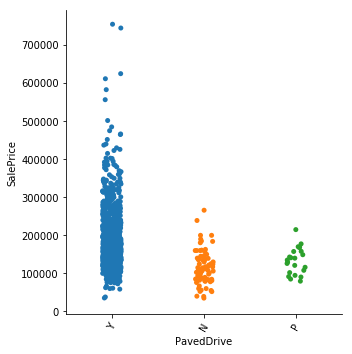

In [54]:
sns.catplot(x="PavedDrive", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

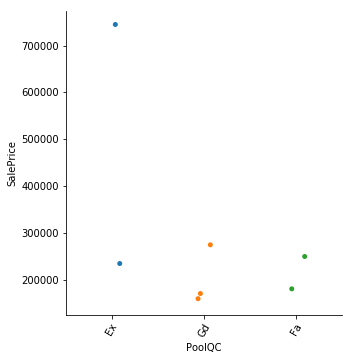

In [55]:
sns.catplot(x="PoolQC", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

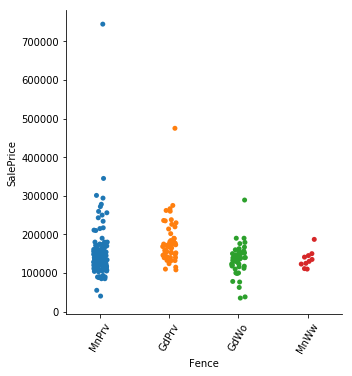

In [56]:
sns.catplot(x="Fence", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

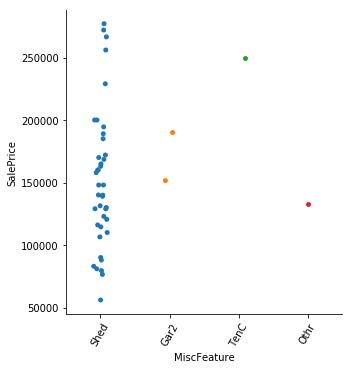

In [57]:
sns.catplot(x="MiscFeature", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

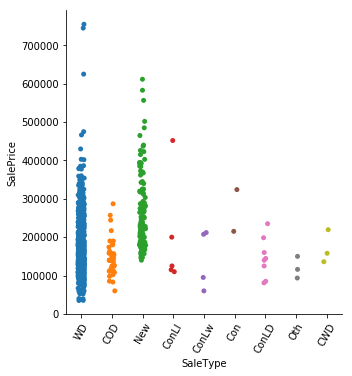

In [58]:
sns.catplot(x="SaleType", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

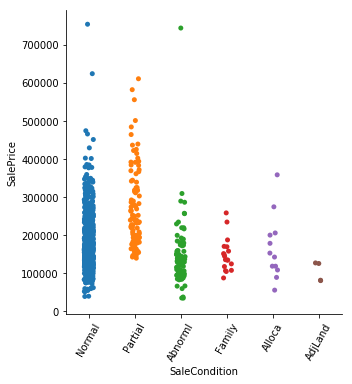

In [59]:
sns.catplot(x="SaleCondition", y="SalePrice", data=df_train)
plt.xticks(rotation=60)

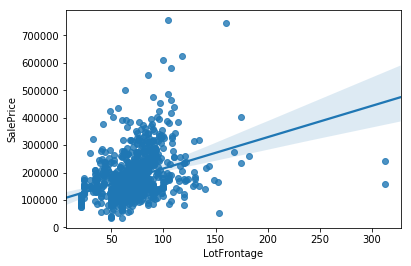

In [60]:
sns.regplot(x=df_train["LotFrontage"], y=df_train["SalePrice"])

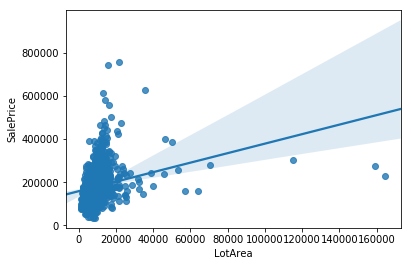

In [61]:
sns.regplot(x=df_train["LotArea"], y=df_train["SalePrice"])

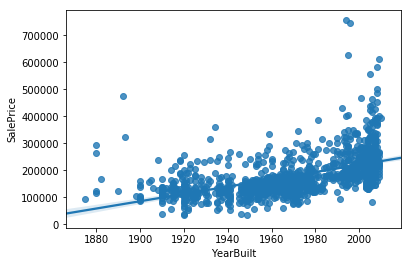

In [62]:
sns.regplot(x=df_train["YearBuilt"], y=df_train["SalePrice"])

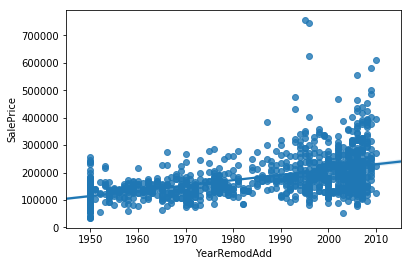

In [63]:
sns.regplot(x=df_train["YearRemodAdd"], y=df_train["SalePrice"])

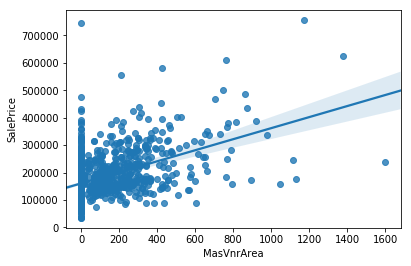

In [64]:
sns.regplot(x=df_train["MasVnrArea"], y=df_train["SalePrice"])

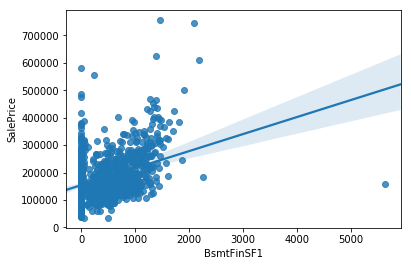

In [65]:
sns.regplot(x=df_train["BsmtFinSF1"], y=df_train["SalePrice"])

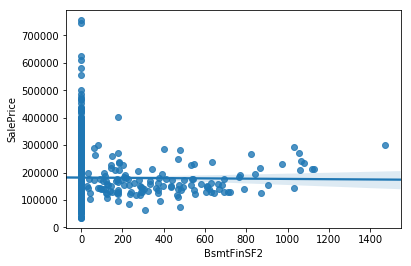

In [66]:
sns.regplot(x=df_train["BsmtFinSF2"], y=df_train["SalePrice"])

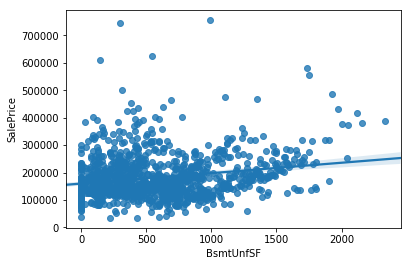

In [67]:
sns.regplot(x=df_train["BsmtUnfSF"], y=df_train["SalePrice"])

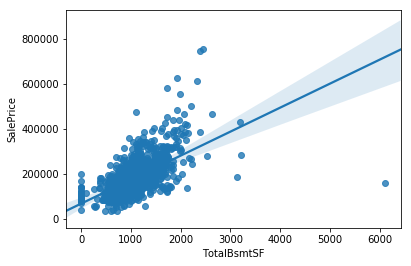

In [68]:
sns.regplot(x=df_train["TotalBsmtSF"], y=df_train["SalePrice"])

with increase in Area of basement sale price also increases.

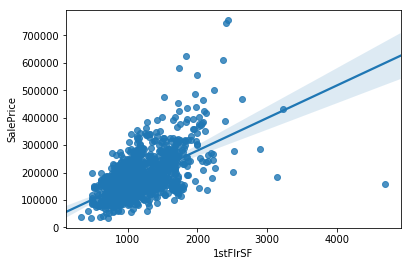

In [69]:
sns.regplot(x=df_train["1stFlrSF"], y=df_train["SalePrice"])

with increase in Area of first floor sale price also increases.

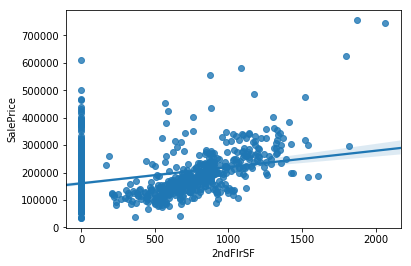

In [70]:
sns.regplot(x=df_train["2ndFlrSF"], y=df_train["SalePrice"])

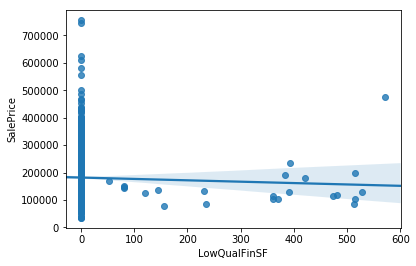

In [71]:
sns.regplot(x=df_train["LowQualFinSF"], y=df_train["SalePrice"])

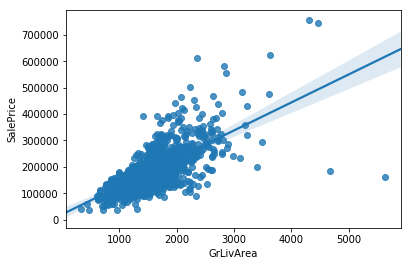

In [72]:
sns.regplot(x=df_train["GrLivArea"], y=df_train["SalePrice"])

with increase in Living Area sale price also increases.

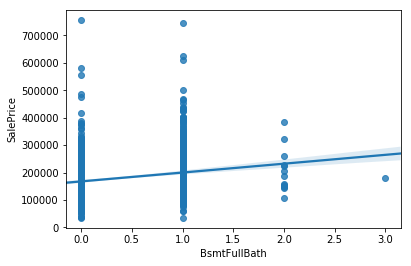

In [73]:
sns.regplot(x=df_train["BsmtFullBath"], y=df_train["SalePrice"])

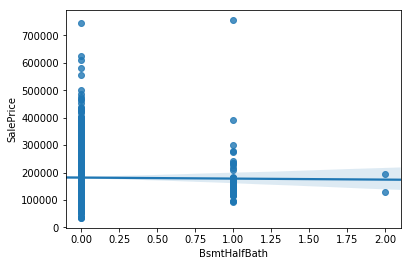

In [74]:
sns.regplot(x=df_train["BsmtHalfBath"], y=df_train["SalePrice"])

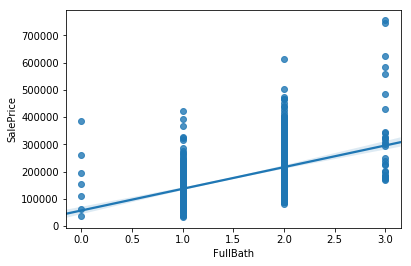

In [75]:
sns.regplot(x=df_train["FullBath"], y=df_train["SalePrice"])

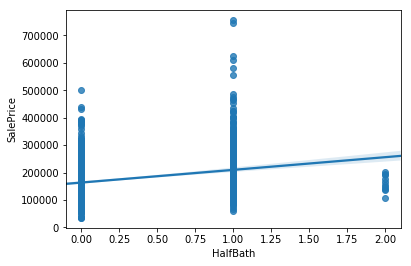

In [76]:
sns.regplot(x=df_train["HalfBath"], y=df_train["SalePrice"])

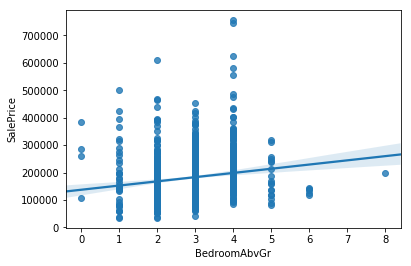

In [77]:
sns.regplot(x=df_train["BedroomAbvGr"], y=df_train["SalePrice"])

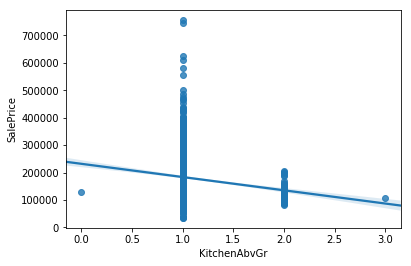

In [78]:
sns.regplot(x=df_train["KitchenAbvGr"], y=df_train["SalePrice"])

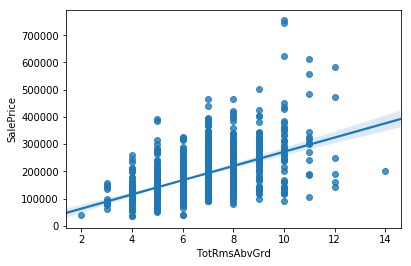

In [79]:
sns.regplot(x=df_train["TotRmsAbvGrd"], y=df_train["SalePrice"])

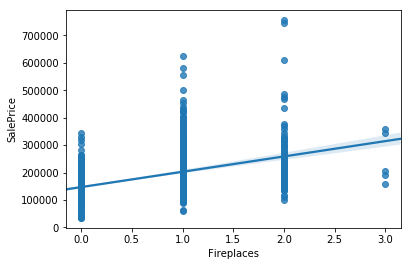

In [80]:
sns.regplot(x=df_train["Fireplaces"], y=df_train["SalePrice"])

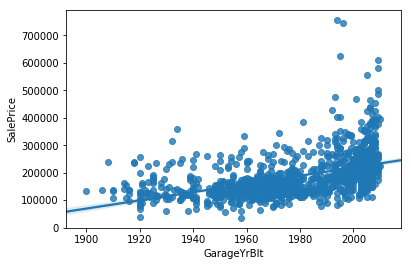

In [81]:
sns.regplot(x=df_train["GarageYrBlt"], y=df_train["SalePrice"])

Freshness of garage also determines the sales price

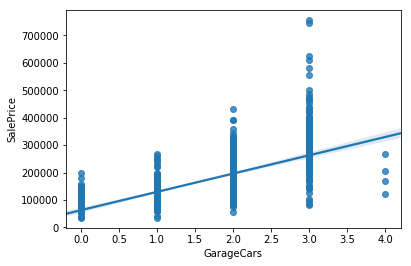

In [82]:
sns.regplot(x=df_train["GarageCars"], y=df_train["SalePrice"])

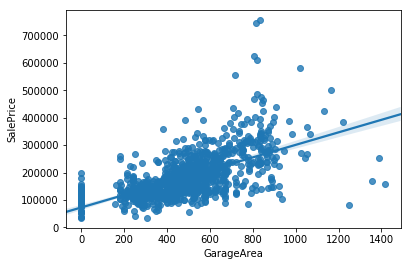

In [83]:
sns.regplot(x=df_train["GarageArea"], y=df_train["SalePrice"])

Price of house increases with increase in garage area.

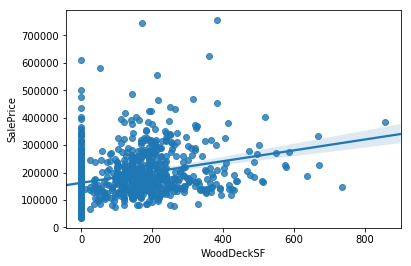

In [84]:
sns.regplot(x=df_train["WoodDeckSF"], y=df_train["SalePrice"])

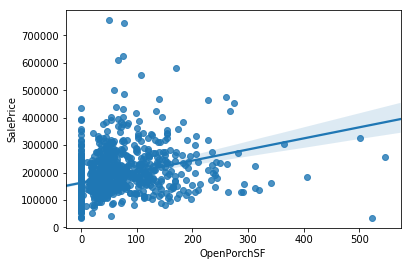

In [85]:
sns.regplot(x=df_train["OpenPorchSF"], y=df_train["SalePrice"])

No clear observation can be made

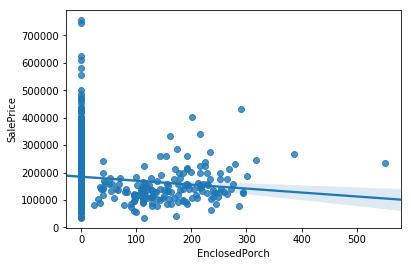

In [86]:
sns.regplot(x=df_train["EnclosedPorch"], y=df_train["SalePrice"])

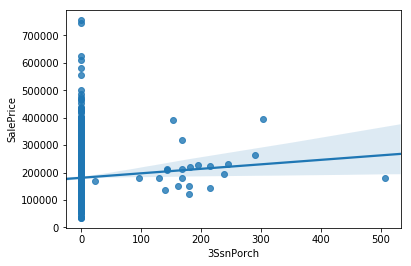

In [87]:
sns.regplot(x=df_train["3SsnPorch"], y=df_train["SalePrice"])

No repationship observed

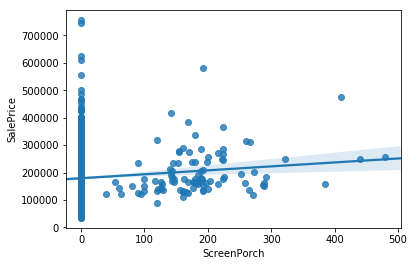

In [88]:
sns.regplot(x=df_train["ScreenPorch"], y=df_train["SalePrice"])

No repationship observed

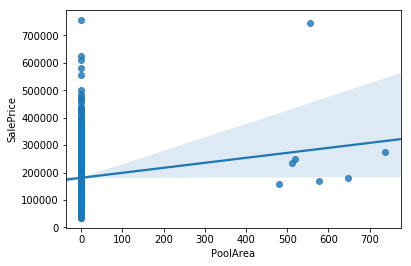

In [89]:
sns.regplot(x=df_train["PoolArea"], y=df_train["SalePrice"])

Presence of pool do effect the price

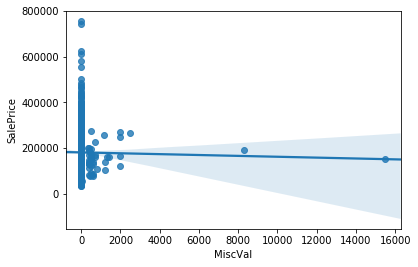

In [90]:
sns.regplot(x=df_train["MiscVal"], y=df_train["SalePrice"])

No repationship observed

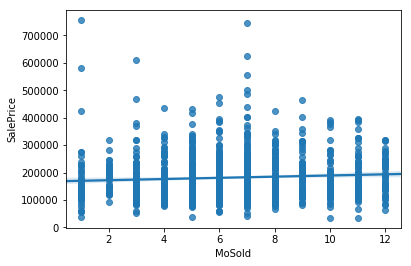

In [91]:
sns.regplot(x=df_train["MoSold"], y=df_train["SalePrice"])

No repationship observed

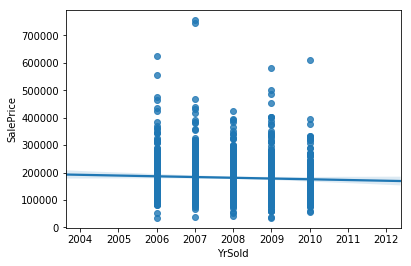

In [92]:
sns.regplot(x=df_train["YrSold"], y=df_train["SalePrice"])

No repationship observed

### Data Pre-processing

In [93]:
df_train["Alley"].fillna(value="NA",inplace=True)

In [94]:
df_train["MasVnrType"].fillna(value="None",inplace=True)

In [95]:
list=["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", 
       "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for col in list:
    df_train[col].fillna(value="NA",inplace= True)

In [96]:
df_train["LotFrontage"].fillna(value=df_train["LotFrontage"].mean(),inplace= True)
df_train["MasVnrArea"].fillna(value= 0,inplace= True)
df_train["GarageYrBlt"].fillna(value=0,inplace= True)

In [97]:
df_train.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
                ..
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC      

We have removed all the null values now we will move forward to encode all the object type variables to make it machine learning model friendly.

In [98]:
lab_enc=LabelEncoder()
cols=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
for i in cols:
    df1= lab_enc.fit_transform(df_train[i])
    df_train[i]=df1
df_train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0  127          11         3     70.98847     4928       1      1         0   
1  889           0         3     95.00000    15865       1      1         0   
2  793           5         3     92.00000     9920       1      1         0   
3  110           0         3    105.00000    11751       1      1         0   
4  422           0         3     70.98847    16635       1      1         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            1        0   
1            3          0  ...         0       3      4            1        0   
2            3          0  ...         0       3      4            1        0   
3            3          0  ...         0       3      2            1        0   
4            3          0  ...         0       3      4            1        0   

   MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       2    2007         8              4     128000  
1      10    2007         8              4     268000  
2       6    2007         8              4     269790  
3       1    2010         0              4     190000  
4       6    2009         8              4     215000  

[5 rows x 81 columns]

### Check for Correlation

In [99]:
df_train.corr()

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.010123  0.009307    -0.005969 -0.029212   
MSSubClass     0.010123    1.000000  0.013516    -0.294350 -0.120690   
MSZoning       0.009307    0.013516  1.000000    -0.069661 -0.023328   
LotFrontage   -0.005969   -0.294350 -0.069661     1.000000  0.299452   
LotArea       -0.029212   -0.120690 -0.023328     0.299452  1.000000   
Street         0.003613   -0.029520  0.140215    -0.035309 -0.263973   
Alley         -0.002664    0.078036 -0.415953    -0.084618 -0.037048   
LotShape       0.022978    0.076645  0.053655    -0.144523 -0.189201   
LandContour   -0.020245   -0.021033  0.001175    -0.073451 -0.159038   
Utilities           NaN         NaN       NaN          NaN       NaN   
LotConfig      0.053927    0.066929 -0.027246    -0.192468 -0.152063   
LandSlope      0.007152   -0.022919 -0.023952     0.046051  0.395410   
Neighborhood  -0.014989    0.009875 -0.251833     0.065824  0.010707   
Condition1     0.000425   -0.046613 -0.025651    -0.025581  0.029520   
Condition2     0.031623   -0.021658  0.031959     0.011761  0.040096   
BldgType       0.026302    0.699825 -0.024776    -0.403220 -0.215345   
HouseStyle     0.014518    0.436668 -0.110991     0.056321 -0.040637   
OverallQual   -0.036965    0.093762 -0.134037     0.229218  0.107188   
OverallCond    0.039761   -0.056259  0.189553    -0.047573  0.017513   
YearBuilt     -0.016942    0.030132 -0.299732     0.112655  0.005506   
YearRemodAdd  -0.018590    0.057686 -0.174586     0.088799  0.027228   
RoofStyle      0.037059   -0.109904  0.000913     0.146222  0.038615   
RoofMatl      -0.023900   -0.021178  0.009719     0.082566  0.194142   
Exterior1st   -0.045575   -0.088935 -0.012037     0.087727  0.048265   
Exterior2nd   -0.045721   -0.111097  0.005548     0.110762  0.027328   
MasVnrType     0.064161   -0.030195 -0.033521    -0.034388 -0.005204   
MasVnrArea    -0.061397    0.037192 -0.059170     0.188108  0.120192   
ExterQual     -0.006231   -0.028107  0.184815    -0.169835 -0.057865   
ExterCond      0.039946    0.010931 -0.099269     0.044582  0.011438   
Foundation    -0.006339    0.069520 -0.244844     0.090734 -0.021195   
...                 ...         ...       ...          ...       ...   
BedroomAbvGr   0.009376    0.034299 -0.001906     0.237199  0.117351   
KitchenAbvGr   0.001216    0.324594  0.026744    -0.002729 -0.013075   
KitchenQual   -0.000240   -0.018333  0.111689    -0.174713 -0.064278   
TotRmsAbvGrd  -0.001613    0.117793 -0.031062     0.318771  0.184546   
Functional     0.019812    0.040881 -0.091684     0.039272 -0.033165   
Fireplaces    -0.024175   -0.010739  0.010658     0.230610  0.285983   
FireplaceQu    0.003197    0.048355  0.002908     0.005183  0.049766   
GarageType     0.004283    0.108879  0.135666    -0.258609 -0.160511   
GarageYrBlt    0.007559   -0.068978 -0.050355     0.106911  0.078849   
GarageFinish   0.010664   -0.052239  0.123947    -0.135570 -0.093199   
GarageCars     0.007549   -0.000458 -0.126031     0.260252  0.158313   
GarageArea     0.010048   -0.072808 -0.168364     0.322644  0.195162   
GarageQual    -0.005277   -0.052249 -0.166777     0.089550  0.045904   
GarageCond    -0.000456   -0.067822 -0.092038     0.095881  0.075800   
PavedDrive    -0.009755   -0.062519 -0.077280     0.092551  0.021907   
WoodDeckSF    -0.027498   -0.012549 -0.004509     0.088334  0.216720   
OpenPorchSF   -0.013642    0.030181 -0.152694     0.151328  0.093080   
EnclosedPorch  0.004885    0.002640  0.111221     0.020902 -0.007446   
3SsnPorch     -0.021773   -0.043832  0.004409     0.051084  0.025794   
ScreenPorch    0.005169   -0.006136  0.030793     0.030405  0.025256   
PoolArea       0.065832    0.023442 -0.001663     0.196001  0.097107   
PoolQC        -0.039536   -0.016902  0.001533    -0.207693 -0.081488   
Fence         -0.002688    0.098981 -0.070105    -0.052913  0.030193   
MiscFeature   -0.009384   -0.048599 -0.011200    -0.000737  0

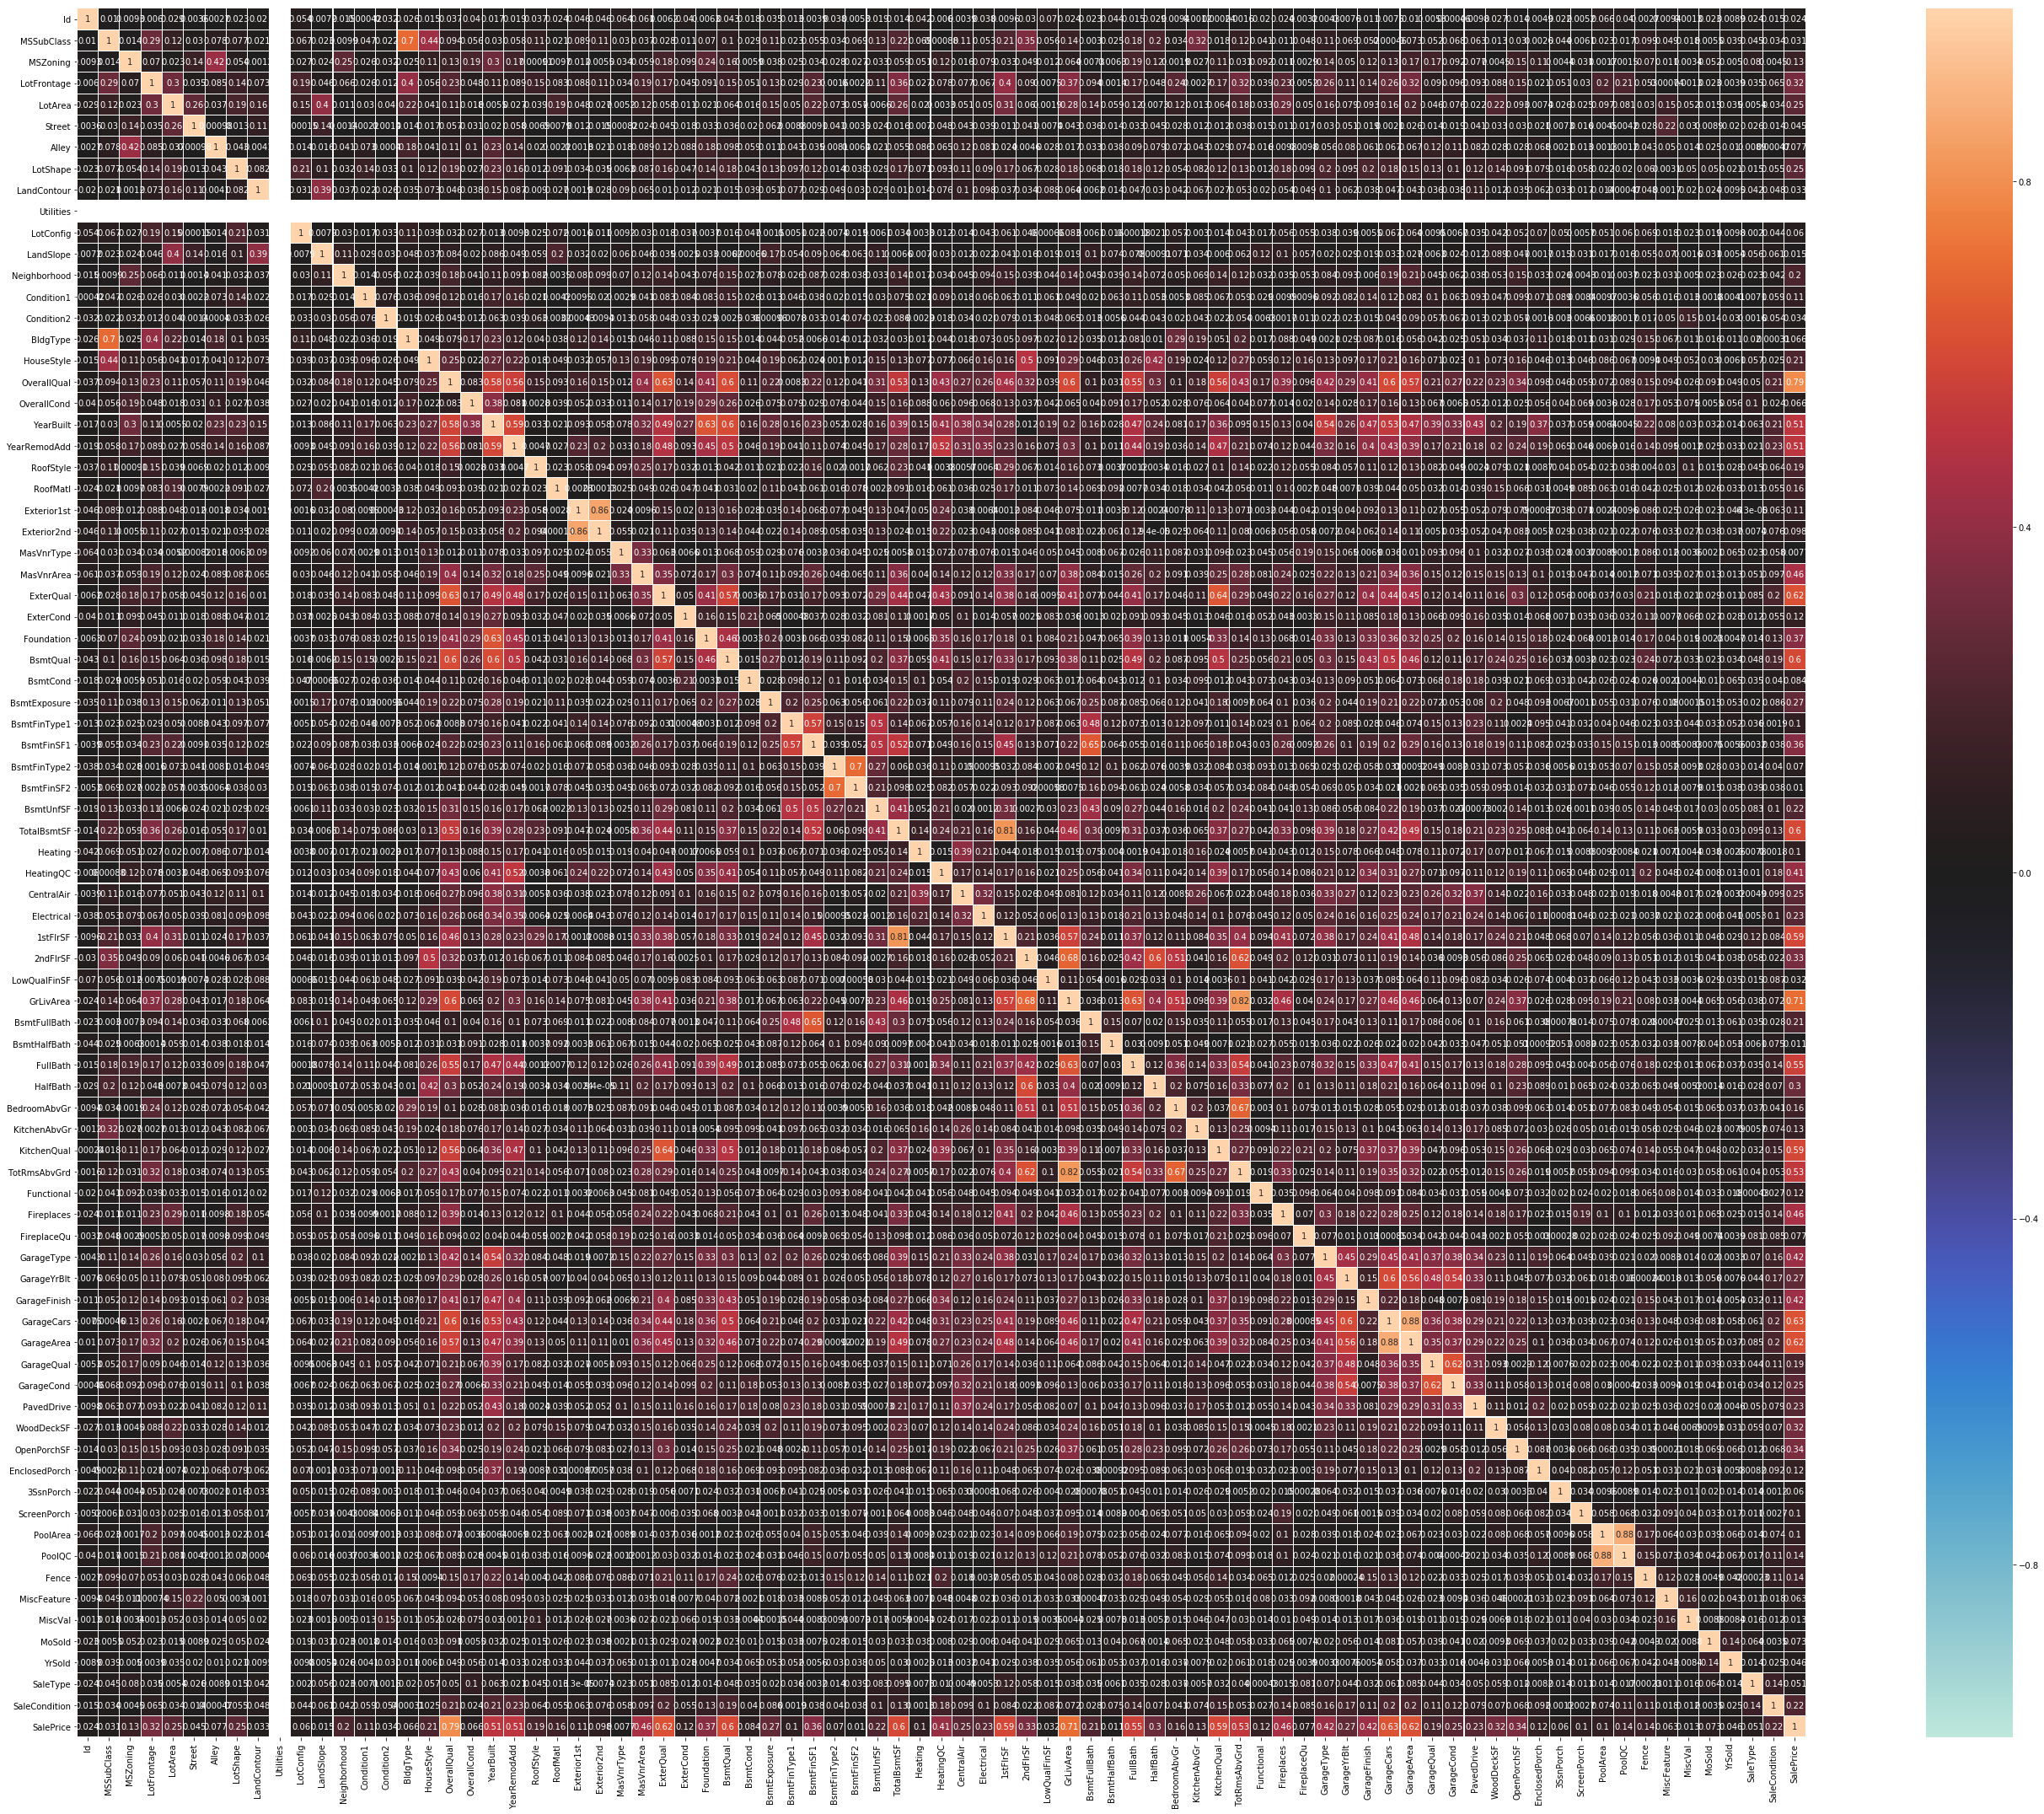

In [100]:
## HeatMap
df_corr= df_train.corr().abs()
plt.figure(figsize=(40,30))
sns.heatmap(df_corr, vmin=-1, vmax=1, annot=True, square=True, center=0, fmt='.2g', linewidth=.1)
plt.tight_layout()

In [101]:
# Correlation with target variable
corr_mat=df_train.corr()
corr_mat["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.460535
Fireplaces       0.459611
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
GarageYrBlt      0.265622
LotArea          0.249499
GarageCond       0.249340
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
                   ...   
LandSlope        0.015485
MasVnrType       0.007732
BsmtFinSF2      -0.010151
BsmtHalfBath    -0.011109
MiscVal         -0.013071
Id              -0.023897
MSSubClass      -0.031126
LowQualFinSF

We observe multicollinearity between basement area and 1st floor area also between Garage cars and Garage area. 

Also we observe very less correlation of some features with target variable.

### Check for outliers

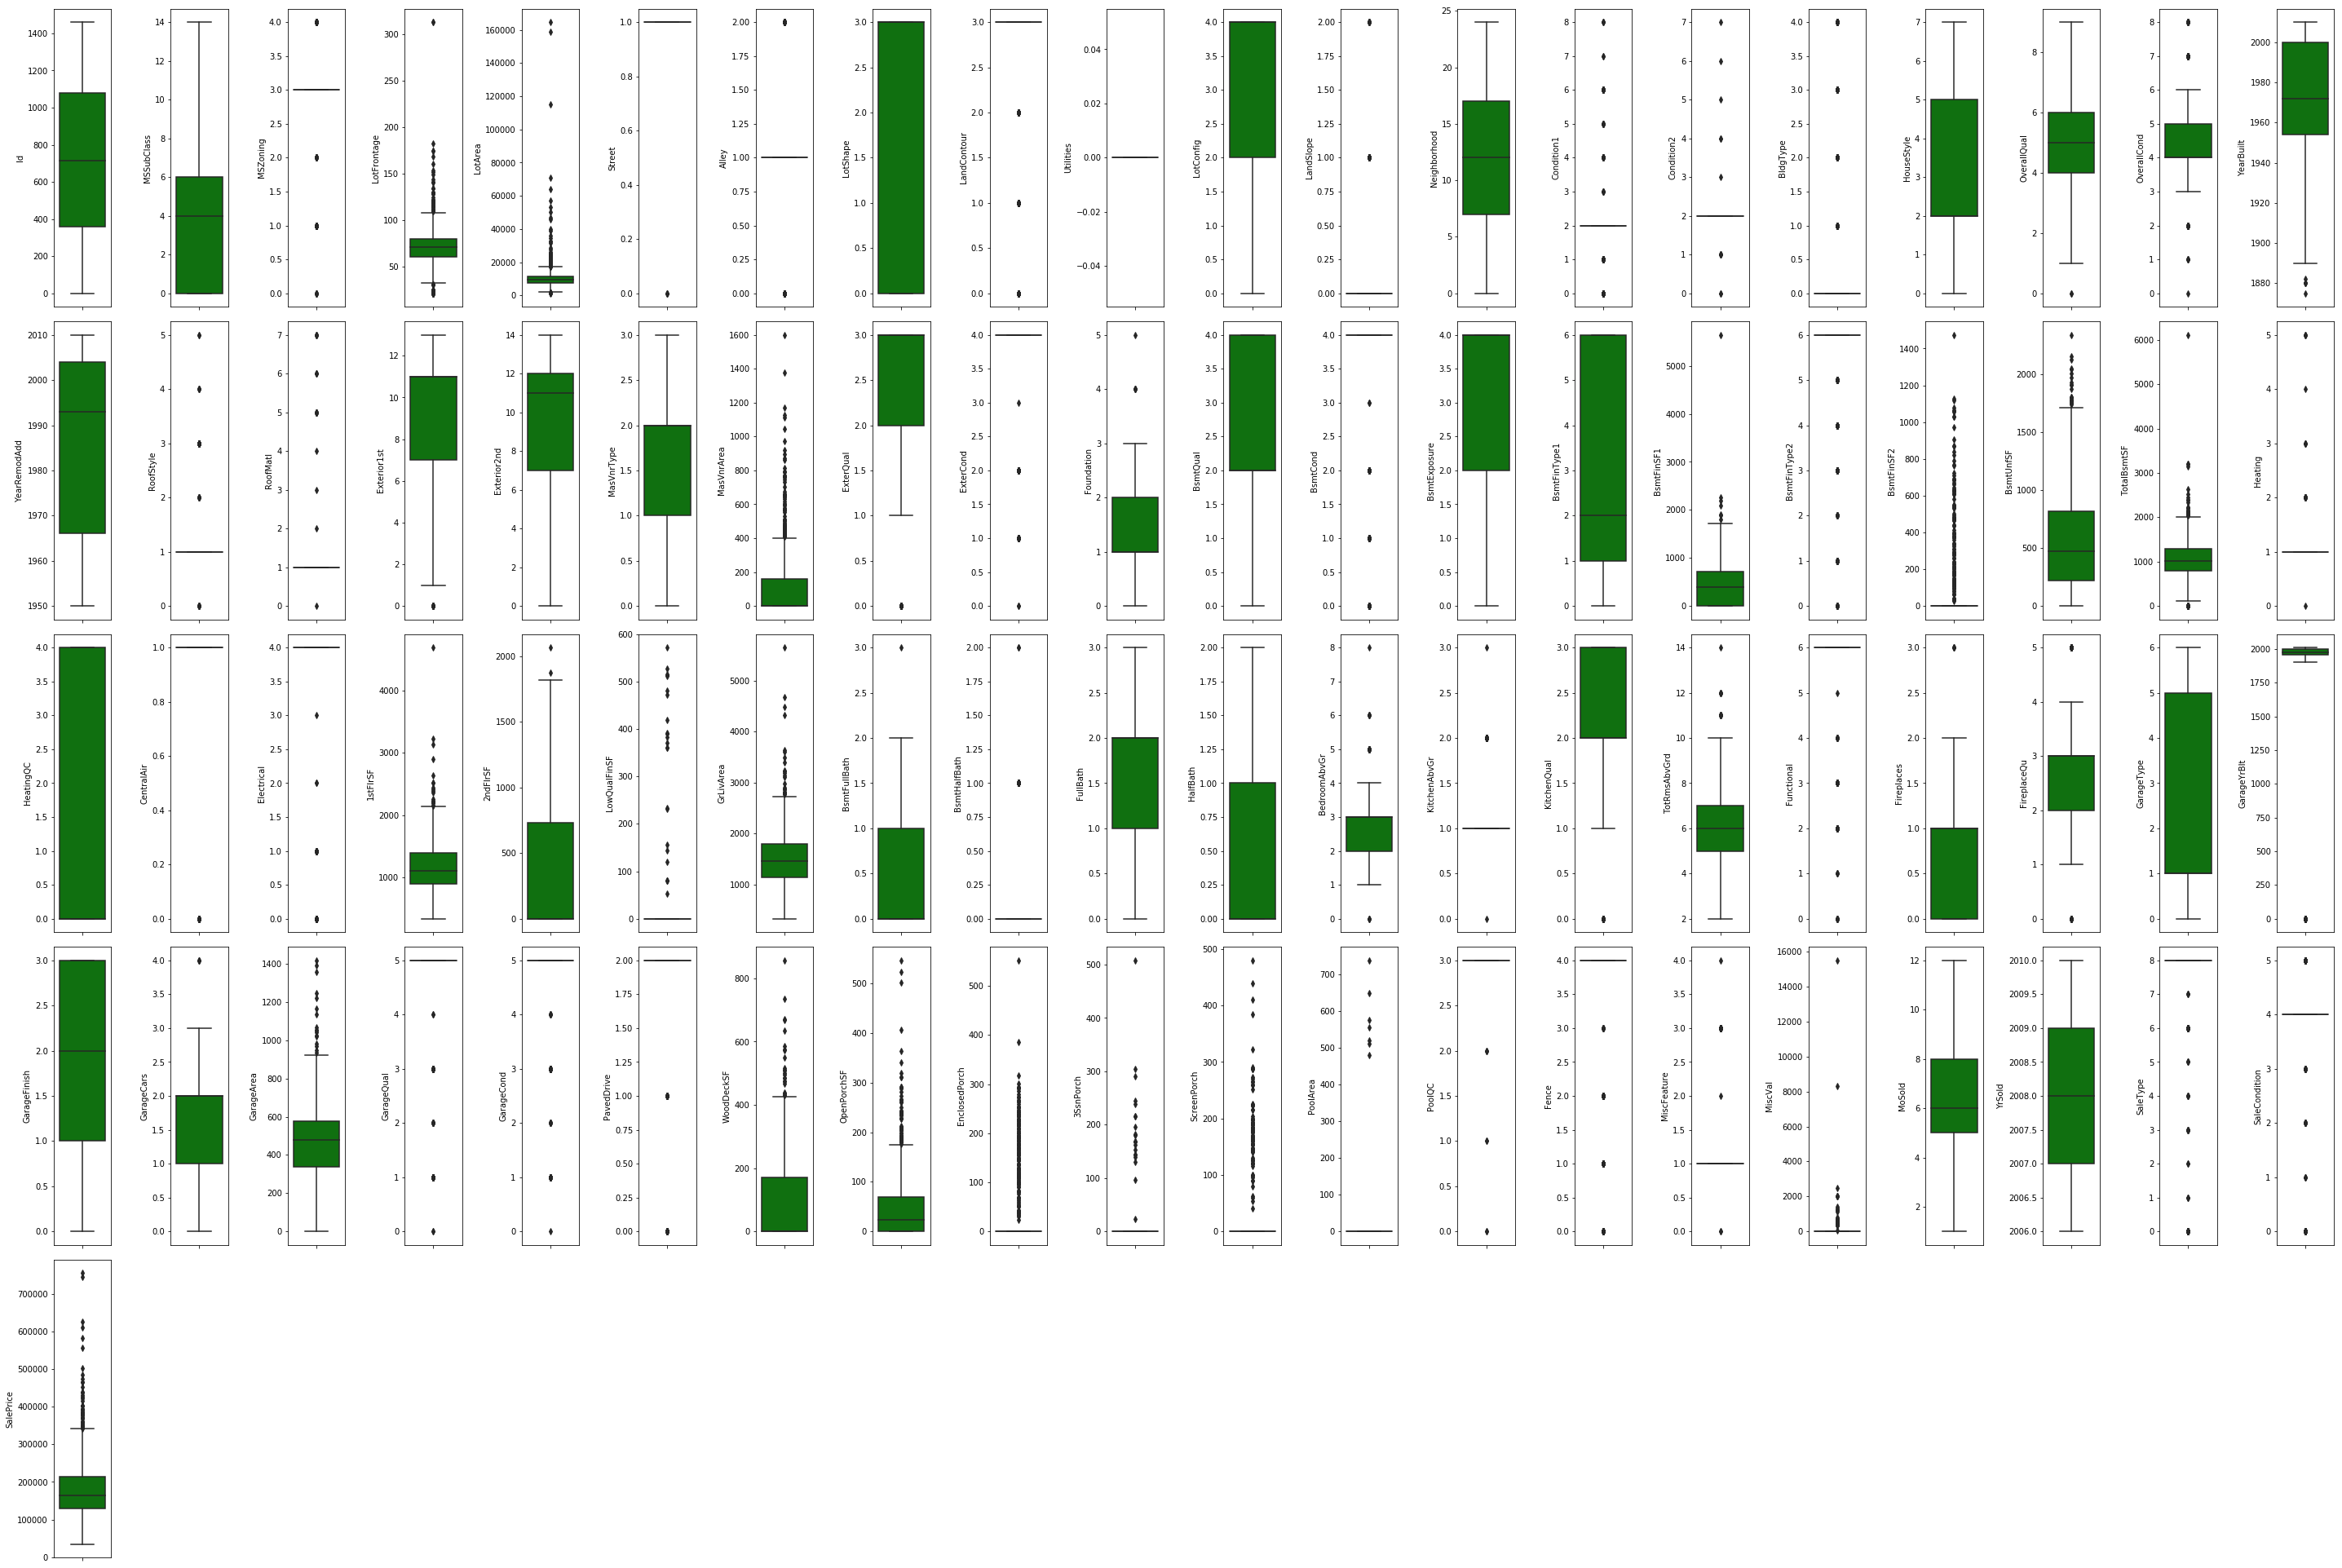

In [102]:
collist=df_train.columns.values
plt.figure(figsize=(40,80))
for i in range(0,len(collist)):
    plt.subplot(15,20,i+1)
    sns.boxplot(df_train[collist[i]],color='green',orient='v')
    plt.tight_layout()

LotFrontage, LotArea, MasVnrArea, BsmtFinSF2, GarageArea, GrLivArea, WoodDeckSF, OpenPorch, EnclosedPorch, ScreenPorch, 3SsnPorch consists of outliers.

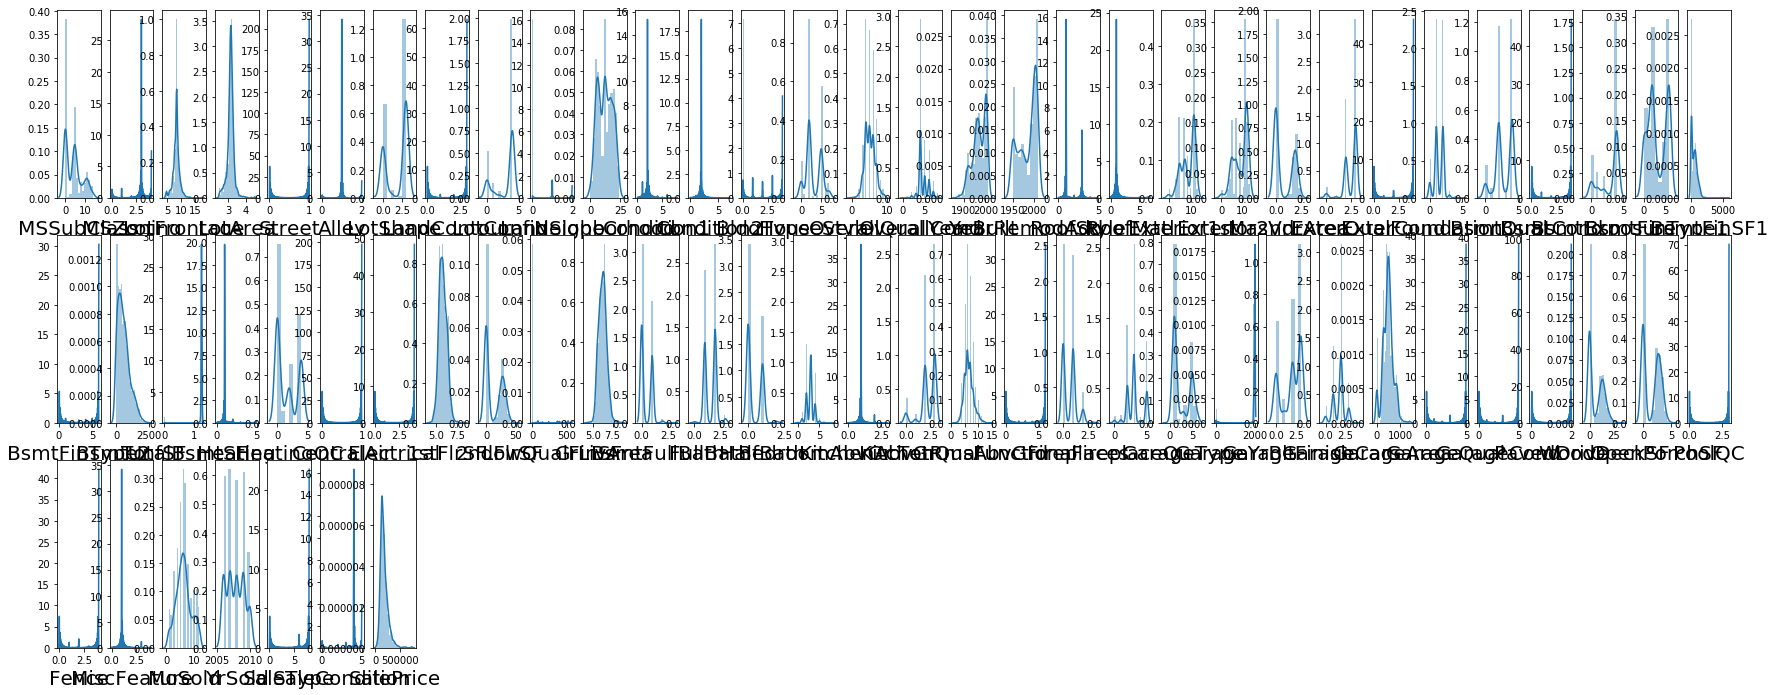

In [136]:
## checking for Normal Distribution of curve
plt.figure(figsize=(30,20),facecolor='white')
plotnumber=1

for column in df_train:
    if plotnumber<=80:
        ax=plt.subplot(5,32,plotnumber)
        sns.distplot(df_train[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Data Cleaning

In [104]:
df_train.drop(columns=["Utilities", "Id"], inplace= True)  ## only one value in utilities and id won't impact sale price.

We will delete these columns as they have outliers and also less correlation with target variable.

In [105]:
df_train.drop(columns=["BsmtHalfBath","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MasVnrType","BsmtFinSF2"],inplace=True)

In [106]:
df_new=df_train

In [107]:
#skewness in data
df_cont=df_train[["LotFrontage","LotArea","YearBuilt","YearRemodAdd","MasVnrArea","BsmtUnfSF","TotalBsmtSF","1stFlrSF",
                  "2ndFlrSF","LowQualFinSF","GrLivArea","BsmtFullBath","FullBath","HalfBath","BedroomAbvGr","TotRmsAbvGrd", 
                  "GarageYrBlt","GarageCars", "GarageArea", "WoodDeckSF","OpenPorchSF","MiscVal","YrSold","MoSold"]]
df_cont.skew()

LotFrontage      2.710383
LotArea         10.659285
YearBuilt       -0.579204
YearRemodAdd    -0.495864
MasVnrArea       2.835718
BsmtUnfSF        0.909057
TotalBsmtSF      1.744591
1stFlrSF         1.513707
2ndFlrSF         0.823479
LowQualFinSF     8.666142
GrLivArea        1.449952
BsmtFullBath     0.627106
FullBath         0.057809
HalfBath         0.656492
BedroomAbvGr     0.243855
TotRmsAbvGrd     0.644657
GarageYrBlt     -3.898694
GarageCars      -0.358556
GarageArea       0.189665
WoodDeckSF       1.504929
OpenPorchSF      2.410840
MiscVal         23.065943
YrSold           0.115765
MoSold           0.220979
dtype: float64

Since MiscVal has too high skewness and a very less correlation we can drop this.

In [108]:
df_new.drop(columns=["MiscVal"],inplace=True)

In [109]:
list=["LotArea","LotFrontage","MasVnrArea","TotalBsmtSF","1stFlrSF","2ndFlrSF","GrLivArea","WoodDeckSF","OpenPorchSF"]
for val in list:
    for i in range(5):
        if df_new.skew().loc[val]>0.55 or df_new.skew().loc[val]<-0.55:
            df_new[val]=np.sqrt(df_new[val])
        else:
            break;
    print(val,"  ",df_new.skew().loc[val])

LotArea    0.5106396043218686
LotFrontage    0.5417955995240202
MasVnrArea    0.4554611002413637
TotalBsmtSF    -5.958814801320211
1stFlrSF    0.38040961795649075
2ndFlrSF    0.4255472652967646
GrLivArea    0.30186994556335084
WoodDeckSF    0.4583033345713765
OpenPorchSF    0.03331968712784045


In [110]:
# Seperating feature and target variable
x=df_new.drop(columns=["SalePrice"])
y=df_new["SalePrice"]

In [111]:
## Scaling data
scale= StandardScaler()
x_scaled=scale.fit_transform(x)

In [112]:
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state=3)

## Model Building

#### Linear Regression

In [113]:
lm= LinearRegression()
lm.fit(x_train,y_train)
y_pred= lm.predict(x_test)
score_lm=lm.score(x_test,y_test)
print("Linear regression: Accuracy = ",score_lm)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))

Linear regression: Accuracy =  0.8404565051241173
Root Mean Squared Error=  30144.336824795242
Mean Squared Error=  908681042.6067065


Model Regularization using Lasso CV

In [114]:
lasscv= LassoCV(alphas=None, max_iter=1000, normalize= True)
lasscv.fit(x_train,y_train)
alpha= lasscv.alpha_
lasso_reg= Lasso(alpha)
lasso_reg.fit(x_train,y_train)
lass_score=lasso_reg.score(x_test,y_test)
print("R2 score = ",lasso_reg.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score =  0.8436515672977277
Mean Squared Error=  908681042.6067065
Root Mean Squared Error=  30144.336824795242


#### KNN Model

In [115]:
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)
y_pred= knn.predict(x_test)
score_knn=knn.score(x_test,y_test)
print("KNN regression: Accuracy = ",score_knn)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

KNN regression: Accuracy =  0.7573364281694622
Root Mean Squared Error=  37176.49791302192


#### Decision Tree Regression

In [116]:
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)
y_pred= dt.predict(x_test)
score_dt=dt.score(x_test,y_test)
print("Decision Tree regression: Accuracy = ",score_dt)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Decision Tree regression: Accuracy =  0.7599723514663419
Root Mean Squared Error=  36974.03248635445


#### Random Forest Regression

In [117]:
from sklearn.ensemble import RandomForestRegressor
rmf= RandomForestRegressor()
rmf.fit(x_train,y_train)
y_pred= rmf.predict(x_test)
score_rmf=rmf.score(x_test,y_test)
print("Random Forest regression: Accuracy = ",score_rmf)
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))

Random Forest regression: Accuracy =  0.859488250900489
Root Mean Squared Error=  28289.319666469983


### Model Evaluation 
(Using Cross Validation technique)

#### Linear Regression

In [118]:
lm_cv=cross_val_score(lm,x_train, y_train,cv=5).mean()
lm_cv

0.674913275222568

#### KNN Model

In [119]:
knn_cv=cross_val_score(knn,x_train, y_train,cv=5).mean()
knn_cv

0.7023854005635602

#### Decision Tree Regression

In [120]:
dt_cv=cross_val_score(dt,x_train, y_train,cv=5).mean()
dt_cv

0.7417847496072845

#### Lasso CV

In [121]:
lass_cv=cross_val_score(lasso_reg,x_train, y_train,cv=5).mean()
lass_cv

0.6862000465892064

#### Random Forest Regression

In [122]:
rmf_cv=cross_val_score(rmf,x_train, y_train,cv=5).mean()
rmf_cv

0.8380888678751646

In [123]:
print("Difference between R2 Score and CV Score for Linear Regression is: ",score_lm-lm_cv)
print("Difference between R2 Score and CV Score for KNN Model is: ",score_knn-knn_cv)
print("Difference between R2 Score and CV Score for Lasso CV is: ",lass_score-lass_cv)
print("Difference between R2 Score and CV Score for Decision Tree Regressor is: ",score_dt-dt_cv)
print("Difference between R2 Score and CV Score for Random Forest Regressor is: ",score_rmf-rmf_cv)

Difference between R2 Score and CV Score for Linear Regression is:  0.16554322990154924
Difference between R2 Score and CV Score for KNN Model is:  0.05495102760590198
Difference between R2 Score and CV Score for Lasso CV is:  0.1574515207085213
Difference between R2 Score and CV Score for Decision Tree Regressor is:  0.018187601859057434
Difference between R2 Score and CV Score for Random Forest Regressor is:  0.021399383025324403


Thus we will choose random forest regression model as our best model and move further to tune it.

### Hyper parametric tuning

In [124]:
x_train, x_test, y_train,  y_test= train_test_split(x_scaled,y, test_size=0.25,random_state=3)
rfm= RandomForestRegressor()
params={'n_estimators':[13,15], 'criterion':['mse','mae'],
       'max_depth':[10], 'min_samples_split':[4,6],
       'min_samples_leaf':[2,3,4]}
grd=GridSearchCV(rfm,param_grid=params)
grd.fit(x_train,y_train)
print('best params=>',grd.best_params_)

best params=> {'criterion': 'mae', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 15}


In [125]:
rfm= grd.best_estimator_
rfm.fit(x_train,y_train)
y_pred=rfm.predict(x_test)
print("RandomForest regression: Accuracy = ",rfm.score(x_test,y_test))
print("Mean Squared Error= ",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error= ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("Mean Absolute Error= ",mean_absolute_error(y_test,y_pred))

RandomForest regression: Accuracy =  0.8816438824227159
Mean Squared Error=  647741329.303318
Root Mean Squared Error=  25450.76284324928
Mean Absolute Error=  17743.409360730595


In [126]:
## savig model
filename= "HousePrice_prediction.pickle"
pickle.dump(rfm, open(filename, 'wb'))

## We will now load our test data to predict values

In [127]:
df_test=pd.read_csv(r"test.csv")
df_test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [128]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 80 columns):
Id               292 non-null int64
MSSubClass       292 non-null int64
MSZoning         292 non-null object
LotFrontage      247 non-null float64
LotArea          292 non-null int64
Street           292 non-null object
Alley            14 non-null object
LotShape         292 non-null object
LandContour      292 non-null object
Utilities        292 non-null object
LotConfig        292 non-null object
LandSlope        292 non-null object
Neighborhood     292 non-null object
Condition1       292 non-null object
Condition2       292 non-null object
BldgType         292 non-null object
HouseStyle       292 non-null object
OverallQual      292 non-null int64
OverallCond      292 non-null int64
YearBuilt        292 non-null int64
YearRemodAdd     292 non-null int64
RoofStyle        292 non-null object
RoofMatl         292 non-null object
Exterior1st      292 non-null object
Exterior2nd   

### Data Processing Pipeline

In [129]:
df_test.drop(columns=["BsmtHalfBath","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MasVnrType","BsmtFinSF2","Utilities","Id","MiscVal"],inplace=True)

In [130]:
list=["Fence","PoolQC","GarageCond","GarageQual","GarageFinish","GarageType","FireplaceQu","Alley","BsmtQual",
      "BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","MiscFeature"]
for col in list:
    df_test[col].fillna(value="NA",inplace=True)

In [131]:
df_test["LotFrontage"].fillna(value=df_test["LotFrontage"].mean(),inplace= True)
df_test["MasVnrArea"].fillna(value=df_test["MasVnrArea"].mean(),inplace= True)
df_test["GarageYrBlt"].fillna(value=0,inplace= True)

In [132]:
df_test["Electrical"].fillna(value='3',inplace= True)

In [133]:
lab_enc=LabelEncoder()
cols=['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
for i in cols:
    df1= lab_enc.fit_transform(df_test[i])
    df_test[i]=df1
df_test.head()

MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0           0         2    86.000000    14157       1      1         0   
1          11         2    66.425101     5814       1      1         0   
2           0         2    66.425101    11838       1      1         3   
3           6         2    75.000000    12000       1      1         3   
4           5         2    86.000000    14598       1      1         0   

   LandContour  LotConfig  LandSlope  ...  PavedDrive  WoodDeckSF  \
0            1          0          0  ...           2         178   
1            3          1          0  ...           2          63   
2            3          4          0  ...           2         202   
3            0          4          0  ...           2           0   
4            3          1          0  ...           2         100   

   OpenPorchSF  PoolQC  Fence  MiscFeature  MoSold  YrSold  SaleType  \
0           51       0      4            0       7    2007         5   
1            0       0      4            0       8    2009         0   
2          151       0      4            0       6    2009         5   
3            0       0      4            0       7    2009         5   
4           18       0      4            0       1    2008         5   

   SaleCondition  
0              2  
1              0  
2              2  
3              2  
4              2  

[5 rows x 70 columns]

In [134]:
## Prediction using saved model
loaded_model= pickle.load(open("HousePrice_prediction.pickle",'rb'))
price_pred= loaded_model.predict(scale.transform(df_test))

In [135]:
# Saving the list of price in csv format
price_pred=pd.DataFrame(price_pred)
price_pred.to_csv('Price.csv')